# 1. Find best hyperparameter settings
We deduce the 'best' hyperparameter settings of an algorithm from performance data of 100 OpenML datasets.

In [1]:
from hyperimp import settings
from scipy.io import arff
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = arff.loadarff('data/meta_svm.arff')
svm = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_random_forest.arff')
rf = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_adaboost.arff')
ada = pd.DataFrame(data[0])

# group svm data by kernel
g = svm.groupby('kernel')

# create dictionary with dataframes per algorithm
alg_names = ['svm_' + s.decode('UTF-8') for s in list(g.groups.keys())] + ['rf', 'ada']
dfs_all = [g.get_group(x) for x in g.groups] + [rf, ada]
dfs = {}
for alg, df in zip(alg_names, dfs_all):
    dfs[alg] = df

# initialize Alg objects
algs = settings.init_algs('data/parameters.csv', dfs)

In [3]:
# find 'best' settings for each algorithm
n = 10
m = 40
best_settings = {}

for alg in algs:
    best_settings[alg.name] = settings.find_settings(alg, n, m)

print("Best parameter settings (upper, lower, average):")
for alg in best_settings.items():
    print(alg[0])
    for param in alg[1].items():
        print(param)
    print('')

Best parameter settings (upper, lower, average):
ada
('learning_rate', (0.9403636048583638, 1.3690599802270491, 1.134642753589705))
('max_depth', (10.0, 10.0, 10.0))
('n_estimators', (347.0, 347.0, 347.0))

rf
('max_features', (0.10049095794053714, 0.1671092005338944, 0.13380007923721576))
('min_samples_leaf', (1.0, 1.0, 1.0))
('min_samples_split', (3.0, 3.0, 3.0))

svm_poly
('gamma', (0.027771728203031837, 0.08616577095988753, 0.04891801683942932))
('C', (750.2445960405129, 2639.280475839144, 1407.1623624989234))
('tol', (2.3121597756484184e-05, 5.339960699945355e-05, 3.5138073842994044e-05))
('coef0', (0.6354975528283304, 0.8170906933257429, 0.7262941230770367))

svm_rbf
('gamma', (3.0649796171501825e-05, 9.517823176868828e-05, 5.401104890366646e-05))
('C', (3187.5329804684447, 10097.45003439789, 5673.266695941194))
('tol', (1.005008088337355e-05, 2.31606588232691e-05, 1.5256686877761952e-05))

svm_sigmoid
('gamma', (3.054518416172192e-05, 8.61148334256548e-05, 5.1287361465010435e-05

In [4]:
# set ranges used in random search verification experiment
ranges = {'gamma' : np.logspace(-15, 3, 10, base = 2),
          'C' : np.logspace(-5, 15, 10, base = 2),
          'tol' : np.logspace(-5, -1, 10, base = 10),
          'coef0' : np.linspace(0, 1, 10),
          'max_features' : np.linspace(0.1, 0.9, 10), 
          'min_samples_leaf' : np.linspace(1, 20, 10),
          'min_samples_split' : np.linspace(2, 20, 10),
          'learning_rate' : np.logspace(np.log10(0.01), np.log10(2), 10, base = 10),
          'max_depth' : np.linspace(1, 10, 10),
          'n_estimators' : np.linspace(50, 500, 10)
}

print('Parameter ranges used in random search verification experiment:')
for i in ranges.items():
    print('%s \n' % str(i))

Parameter ranges used in random search verification experiment:
('gamma', array([3.05175781e-05, 1.22070312e-04, 4.88281250e-04, 1.95312500e-03,
       7.81250000e-03, 3.12500000e-02, 1.25000000e-01, 5.00000000e-01,
       2.00000000e+00, 8.00000000e+00])) 

('C', array([3.12500000e-02, 1.45816130e-01, 6.80395000e-01, 3.17480210e+00,
       1.48139954e+01, 6.91238233e+01, 3.22539789e+02, 1.50500812e+03,
       7.02254271e+03, 3.27680000e+04])) 

('tol', array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])) 

('coef0', array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])) 

('max_features', array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])) 

('min_samples_leaf', array([ 1.        ,  3.11111111, 

In [5]:
# check if verification experiment settings fall within the best hyper parameter setting ranges 
print("The following parameters of rs verification experiment fall within the 'best' settings:\n")
for alg in best_settings.items():
    for param in alg[1].items():
        name = param[0]
        lower = param[1][0]
        upper = param[1][1]
        for i in ranges[name]:
            if i >= lower and i <= upper:
                print('%s %s: %.5f falls within [%.5f, %.5f]' %(alg[0], name, i, lower, upper))

The following parameters of rs verification experiment fall within the 'best' settings:

ada learning_rate: 1.11009 falls within [0.94036, 1.36906]
ada max_depth: 10.00000 falls within [10.00000, 10.00000]
rf min_samples_leaf: 1.00000 falls within [1.00000, 1.00000]
svm_poly gamma: 0.03125 falls within [0.02777, 0.08617]
svm_poly C: 1505.00812 falls within [750.24460, 2639.28048]
svm_poly tol: 0.00003 falls within [0.00002, 0.00005]
svm_poly coef0: 0.66667 falls within [0.63550, 0.81709]
svm_poly coef0: 0.77778 falls within [0.63550, 0.81709]
svm_rbf C: 7022.54271 falls within [3187.53298, 10097.45003]
svm_sigmoid tol: 0.00167 falls within [0.00150, 0.00346]


# 2. Fixed parameter accuracy vs. Overall best accuracy

We compare the fixed best value with overall best values and see whether the fixed accuracy scores are significantly different from the overall accuracy scores.

In [6]:
# load test set scores (accuracy) of verification experiment
rs__svm_rbf = pd.read_csv('data/verification_svm_rbf.csv')
rs__svm_sigmoid = pd.read_csv('data/verification_svm_sigmoid.csv')

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels

def generate_data(df, parameter, lb, ub):
    # find fixed parameter data for 
    df_fix = df[df['fixed_param'] == parameter]
    df_fix = df_fix.astype({'fixed_value' : 'float'}).reset_index(drop = True)
    df_fix = df_fix[
        (df_fix['fixed_value'] >= lb) & 
        (df_fix['fixed_value'] <= ub)]

    datasets = df_fix['dataset'].unique()

    # find 10 overall best accuracy scores per dataset
    df_overall = pd.DataFrame()
    for dataset, data in df.groupby('dataset'):
        if dataset in datasets:
            top10 = data.sort_values('accuracy', ascending = False)[0:10]
            top10['dataset'] = dataset
            df_overall = df_overall.append(top10)

    # Create dataset with fixed and overall results
    df_overall['type'] = 'overall'
    df_fix['type'] = 'fixed'

    data = df_overall[['dataset', 'accuracy', 'type']].append(
        df_fix[['dataset', 'accuracy', 'type']]).reset_index(drop = True)
    return data

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def aov(data):
    formula = 'accuracy ~ C(type) + C(dataset) + C(type):C(dataset)'
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    return model, aov_table

## 2.1 Algorithm: SVM sigmoid; Parameter: tolerance

In [8]:
df = rs__svm_sigmoid
parameter = 'tol'
lb = 0.00150
ub = 0.00346

# find fixed parameter and top 10 data
data = generate_data(df, parameter, lb, ub)
model, aov_table = aov(data)
print(aov_table)
print(model.summary())

                       sum_sq      df            F         PR(>F)    eta_sq
C(type)              0.305083     1.0   988.932064  8.812873e-162  0.008697
C(dataset)          34.020163    71.0  1553.195353   0.000000e+00  0.969803
C(type):C(dataset)   0.354413    71.0    16.180793  1.799644e-132  0.010103
Residual             0.399813  1296.0          NaN            NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     786.1
Date:                Mon, 26 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:16:53   Log-Likelihood:                 3852.9
No. Observations:                1440   AIC:                            -7418.
Df Residuals:                    1296   BIC:                       

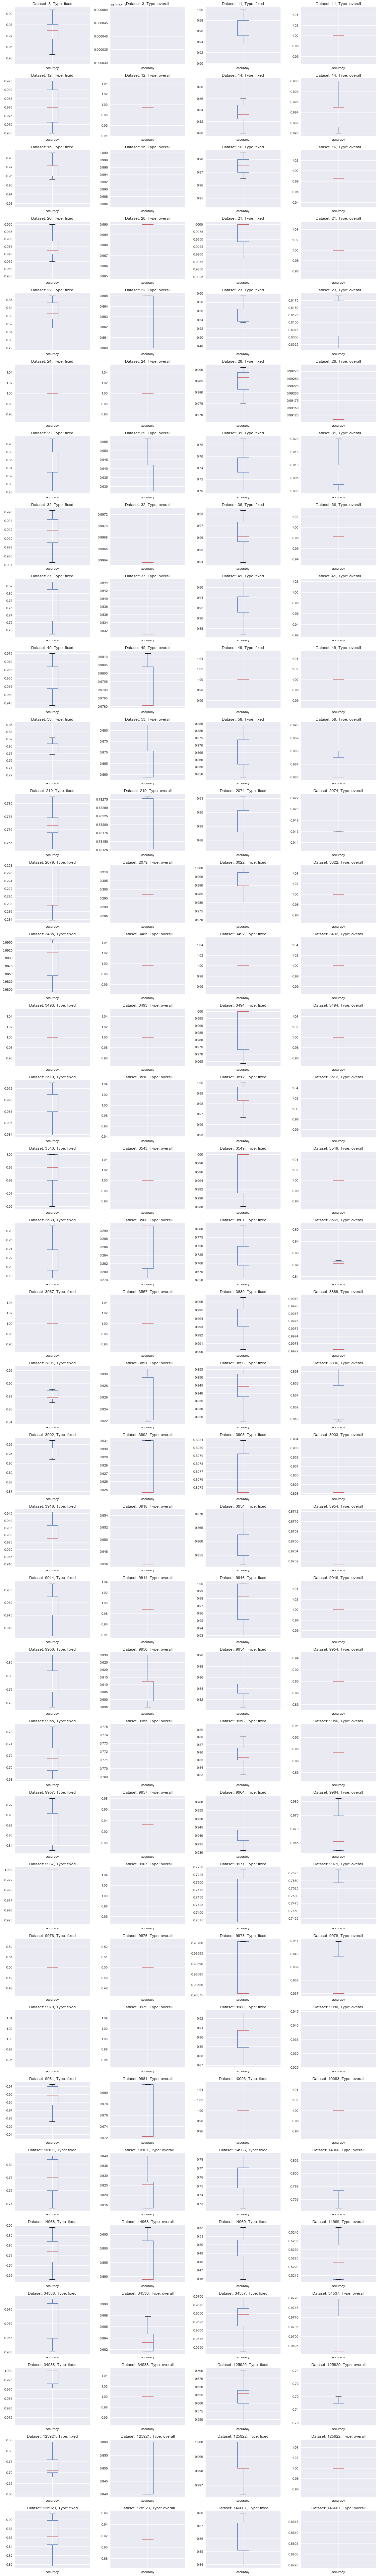

In [9]:
# generate boxplots for each type for each dataset
cols = 4
nr_plots = len(data)/10
rows = math.ceil(nr_plots/cols)
fig = plt.figure(figsize = (4*cols,3*rows))
index = 1
for key, df in data.groupby(['dataset', 'type']):
    ax = fig.add_subplot(rows, cols, index)
    ax = df['accuracy'].plot(kind = 'box')
    ax.set_title('Dataset: %s, Type: %s' % (key[0], key[1]))
    plt.tight_layout()
    index += 1
plt.show()

## 2.2 Algorithm: SVM RBF; Parameter: C(omplexity)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df = rs__svm_rbf
parameter = 'C'
lb = 3187
ub = 10097

# find fixed parameter and top 10 data
data = generate_data(df, parameter, lb, ub)
model, aov_table = aov(data)
print(aov_table)
print(model.summary())

                       sum_sq      df            F         PR(>F)    eta_sq
C(type)              0.456587     1.0  1527.673823  2.658465e-232  0.015089
C(dataset)          28.898722    84.0  1151.082351   0.000000e+00  0.955011
C(type):C(dataset)   0.447488    84.0    17.824174  9.191250e-171  0.014788
Residual             0.457282  1530.0          NaN            NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     590.0
Date:                Mon, 26 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:19:10   Log-Likelihood:                 4575.5
No. Observations:                1700   AIC:                            -8811.
Df Residuals:                    1530   BIC:                       

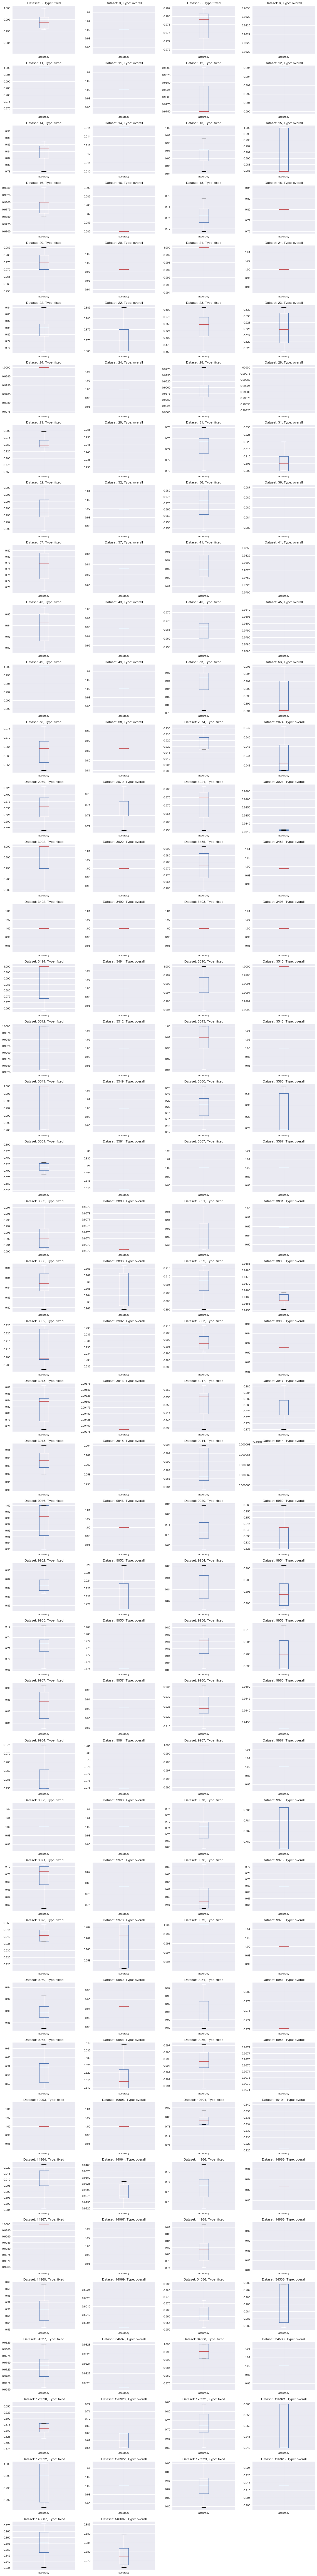

In [11]:
# generate boxplots for each type for each dataset
cols = 4
nr_plots = len(data)/10
rows = math.ceil(nr_plots/cols)
fig = plt.figure(figsize = (4*cols,3*rows))
index = 1
for key, df in data.groupby(['dataset', 'type']):
    ax = fig.add_subplot(rows, cols, index)
    ax = df['accuracy'].plot(kind = 'box')
    ax.set_title('Dataset: %s, Type: %s' % (key[0], key[1]))
    plt.tight_layout()
    index += 1
plt.show()